In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customer = pd.read_csv('olist_customers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')
item = pd.read_csv('olist_order_items_dataset.csv')
payment = pd.read_csv('olist_order_payments_dataset.csv')
product = pd.read_csv('olist_products_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
review = pd.read_csv('olist_order_reviews_dataset.csv')
seller = pd.read_csv('olist_sellers_dataset.csv')
prodinfo = pd.read_csv('product_category_name_translation.csv')

In [6]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
# finding some insights
print('Cities with Sales: ', customer.customer_city.nunique())
print('States with Sales: ', customer.customer_state.nunique())
print(str.format('Average Number of Cities per State: {:.0f}', customer.groupby(by='customer_state').customer_city.value_counts().mean()))

Cities with Sales:  4119
States with Sales:  27
Average Number of Cities per State: 23


Text(0, 0.5, 'No. of Customers')

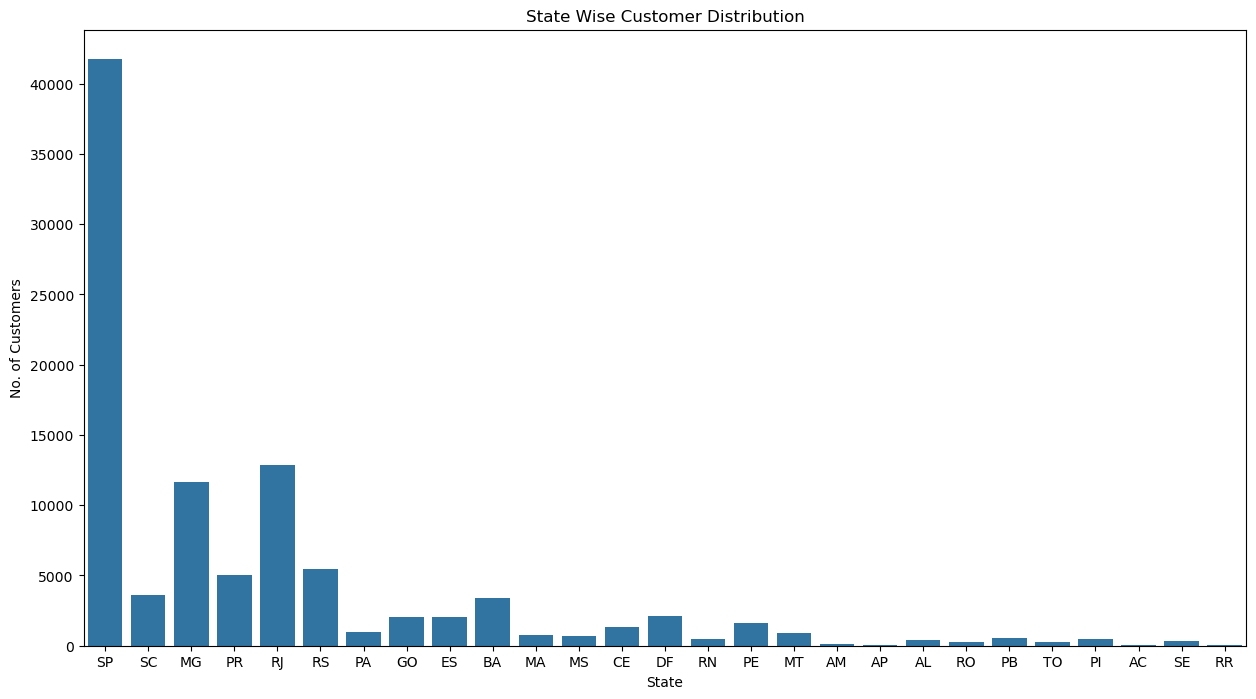

In [ ]:
# plotting state wise customer distribution
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=customer)
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')

In [10]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# checking for missing values
geo.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

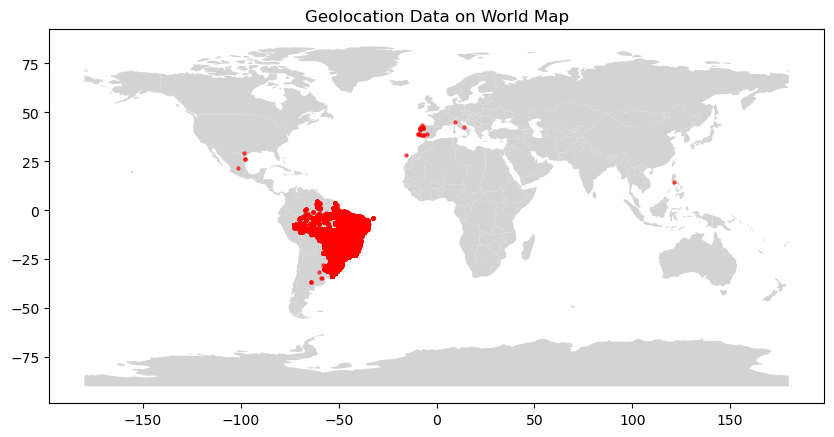

In [23]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create geometry for GeoDataFrame using latitude and longitude
geometry = [Point(xy) for xy in zip(geo['geolocation_lng'], geo['geolocation_lat'])]
gdf = GeoDataFrame(geo, geometry=geometry)

# Load the manually downloaded shapefile for the world map
world_shapefile_path = 'ne_110m_admin_0_countries.shp'  # Update this path
world = gpd.read_file(world_shapefile_path)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.6)
plt.title('Geolocation Data on World Map')
plt.show()


In [24]:
# viewing the first 5 rows of the dataset
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
# checking for missing values
item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Text(0.5, 0, 'Price')

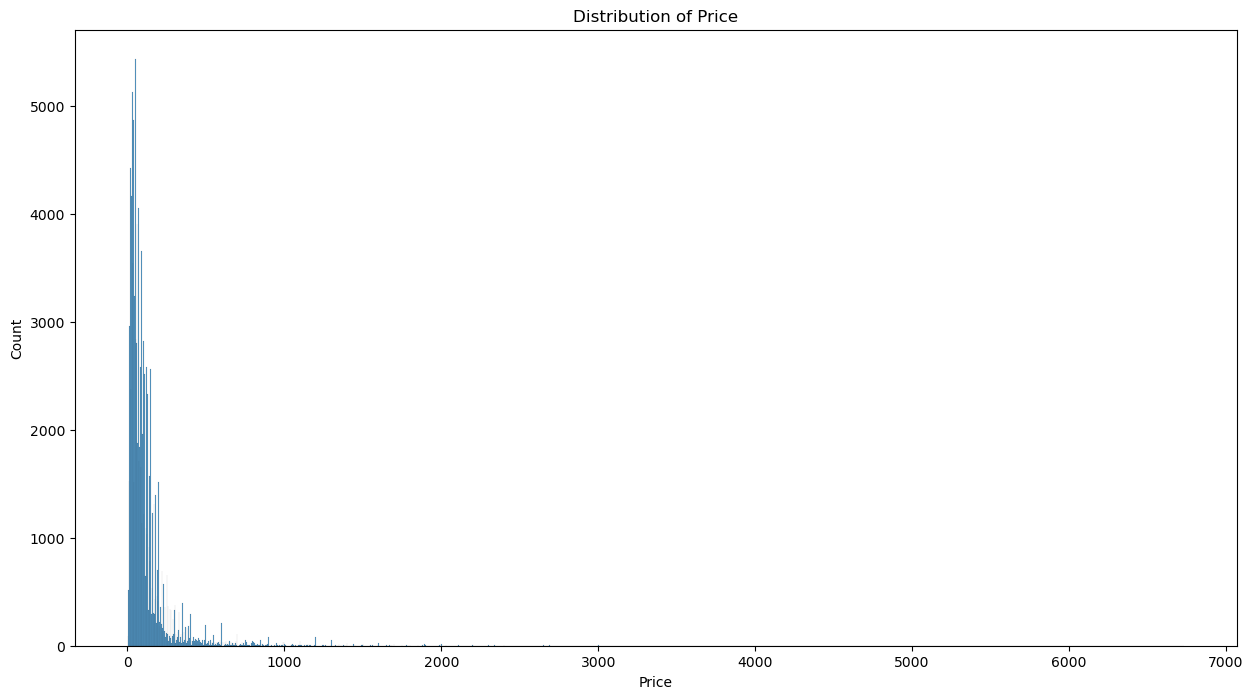

In [26]:
# plotting the distribution of price
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=item)
plt.title('Distribution of Price')
plt.xlabel('Price')

Text(0.5, 0, 'Freight Value')

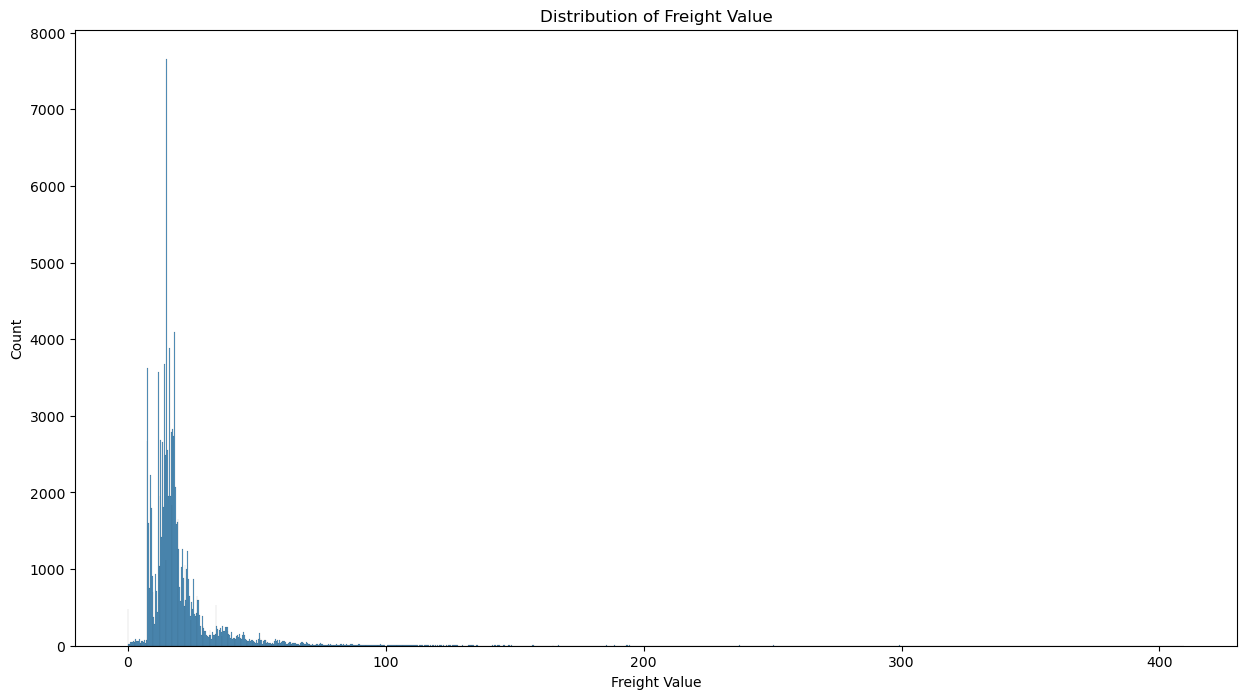

In [27]:
# plotting the distribution of freight value
plt.figure(figsize=(15,8))
sns.histplot(x='freight_value', data=item)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')

In [28]:

# viewing the first 5 rows of the dataset
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
# checking for missing values
payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Text(0, 0.5, 'No. of Customers')

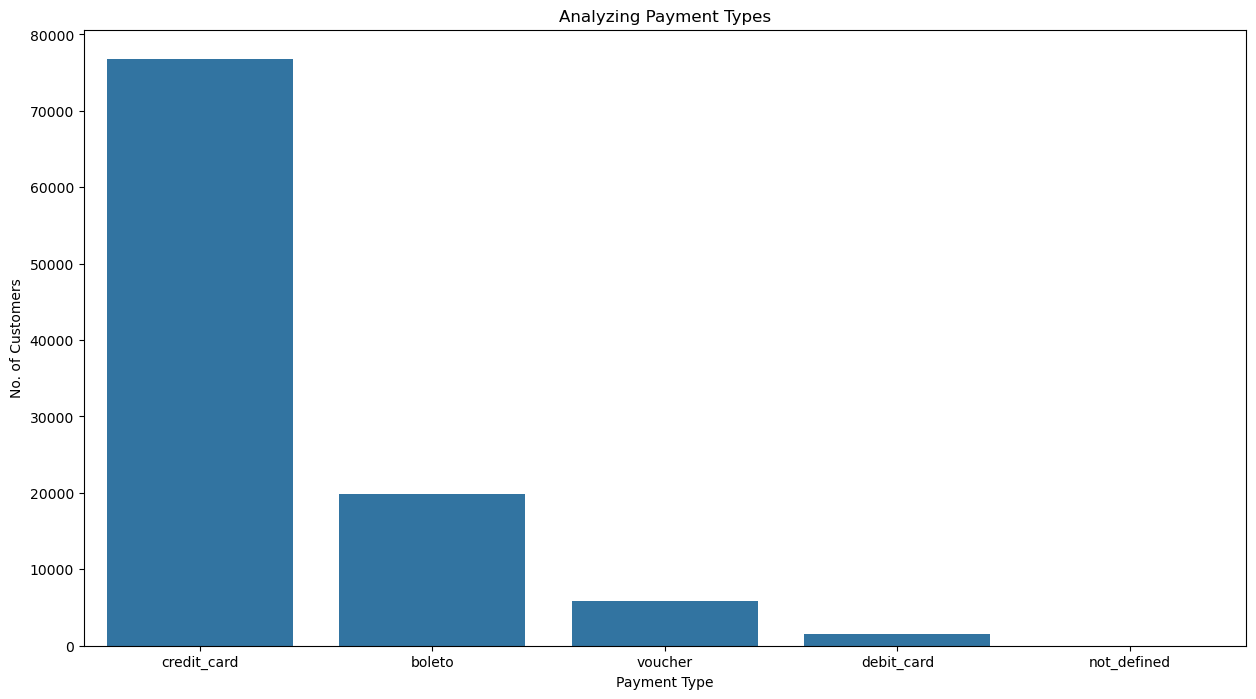

In [30]:
# analyzing the payment methods chosen by different customers
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=payment)
plt.title('Analyzing Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('No. of Customers')

In [31]:
# removing not_defined payment method
payment = payment.loc[payment['payment_type']!='not_defined', :]

Text(0, 0.5, 'No. of Customers')

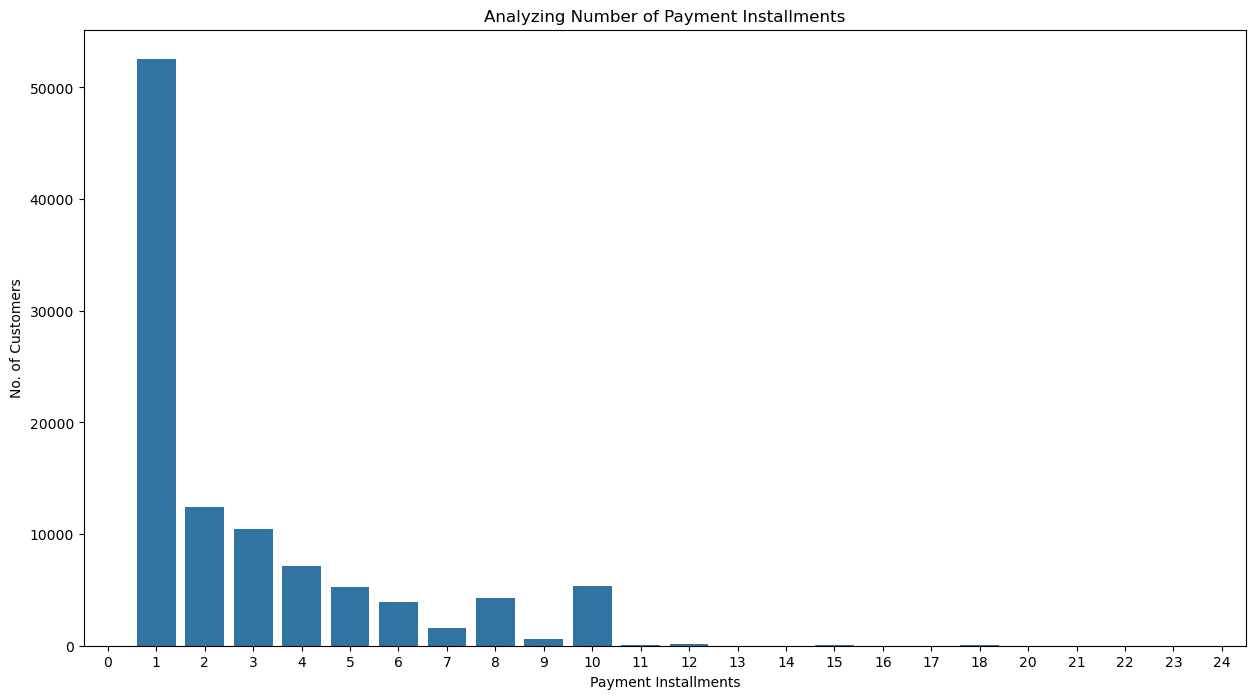

In [32]:
# plotting the distribution of number of installments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=payment)
plt.title('Analyzing Number of Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('No. of Customers')

Text(0, 0.5, 'No. of Orders')

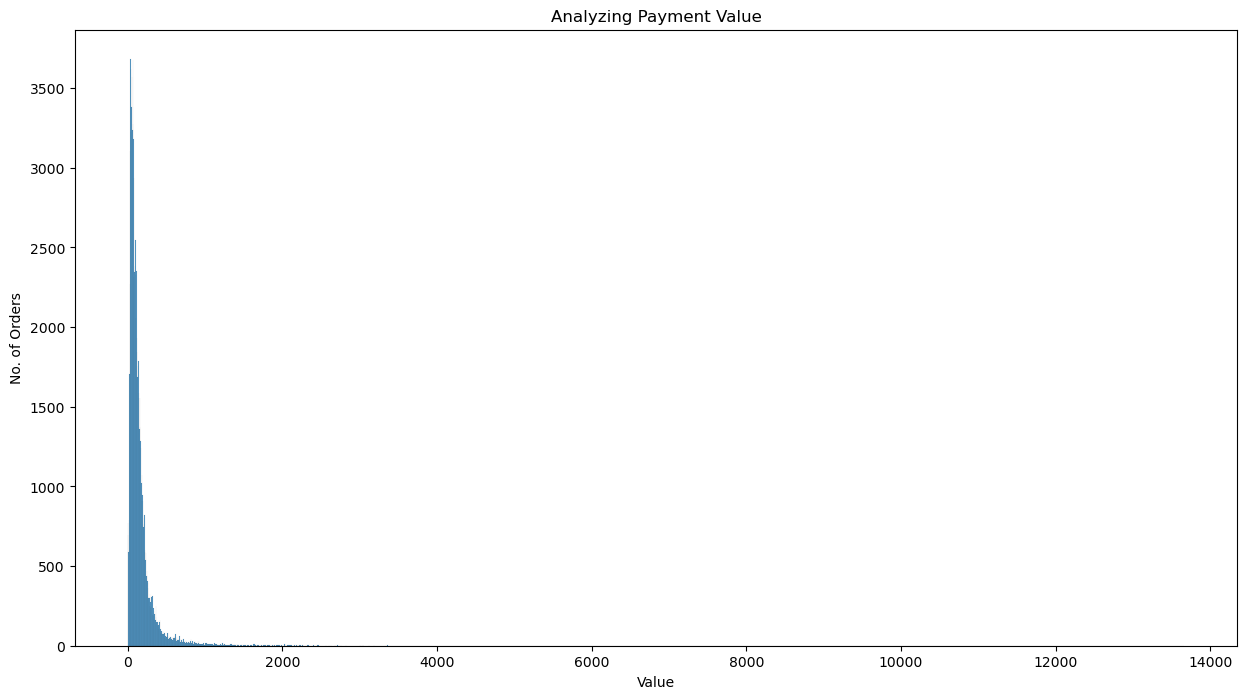

In [34]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=payment)
plt.title('Analyzing Payment Value')
plt.xlabel('Value')
plt.ylabel('No. of Orders')

C:\Users\HP\AppData\Local\Temp\ipykernel_32060\3452840813.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='payment_type', y='payment_value', data=payment, ci=None)


Text(0, 0.5, 'Amount Spent')

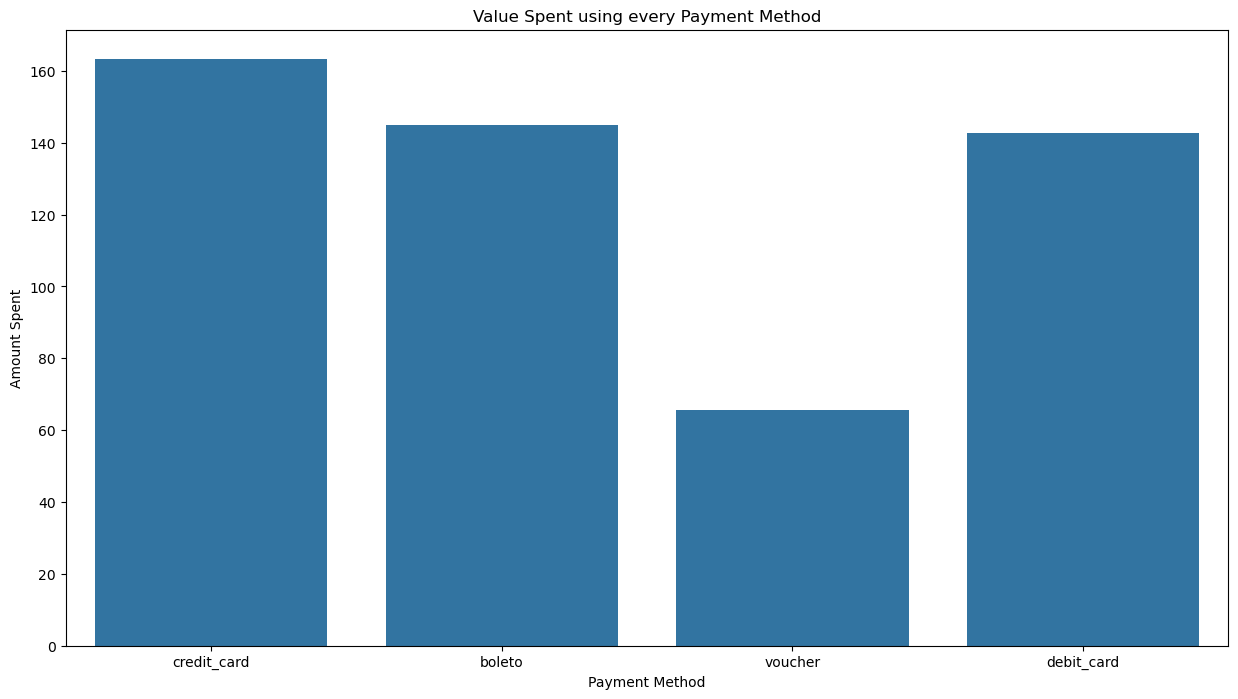

In [35]:
# analyzing amount paid by each payment method
plt.figure(figsize=(15,8))
sns.barplot(x='payment_type', y='payment_value', data=payment, ci=None)
plt.title('Value Spent using every Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Amount Spent')

In [36]:

# viewing the first 5 rows of the dataset
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [37]:
# checking for missing values
review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [38]:
review.shape

(99224, 7)

In [39]:
# dropping columns with many missing values
review = review.drop(columns=['review_comment_title', 'review_comment_message'])

Text(0, 0.5, 'No. of Reviews')

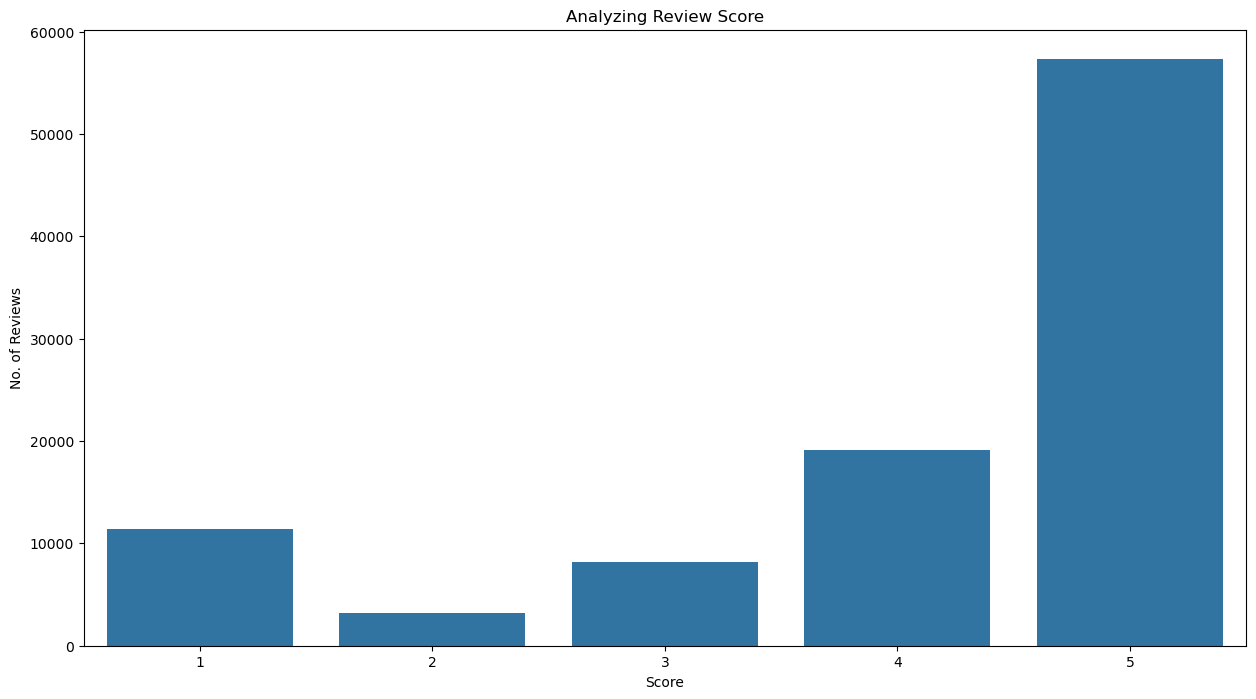

In [40]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=review)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')

In [41]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [42]:
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [43]:
order.shape

(99441, 8)

In [44]:
order = order.dropna()

In [45]:
# analyzing the order status
order.order_status.value_counts()

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

In [47]:
# engineering features
from datetime import datetime as dt
order['diff_app_pur'] = (pd.to_datetime(order.order_approved_at) - pd.to_datetime(order.order_purchase_timestamp)).dt.seconds
order['diff_car_app'] = (pd.to_datetime(order.order_delivered_carrier_date) - pd.to_datetime(order.order_approved_at)).dt.days
order['diff_del_car'] = (pd.to_datetime(order.order_delivered_customer_date) - pd.to_datetime(order.order_delivered_carrier_date)).dt.days
order['diff_est_act'] = (pd.to_datetime(order.order_estimated_delivery_date) - pd.to_datetime(order.order_delivered_customer_date)).dt.days

In [48]:
print(str.format('Average time taken for the order to get approved: {:.2f} seconds', order.diff_app_pur.mean()))
print(str.format('Average time taken for the order to be passed to the logistic partner: {:.0f} days', order.diff_car_app.mean()))
print(str.format('Average time taken for the order to be delivered by the logistic partner: {:.0f} days', order.diff_del_car.mean()))
print(str.format('Average time taken between estimated delivery date and actual delivery date: {:.0f} days', order.diff_est_act.mean()))

Average time taken for the order to get approved: 14160.41 seconds
Average time taken for the order to be passed to the logistic partner: 2 days
Average time taken for the order to be delivered by the logistic partner: 9 days
Average time taken between estimated delivery date and actual delivery date: 11 days


In [49]:
prodinfo.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [50]:
prodinfo.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [51]:
# merging the product and prodinfo tables
product = product.merge(prodinfo, left_on='product_category_name', right_on='product_category_name_english')

In [52]:
product.head()

,product_id,product_category_name_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_y,product_category_name_english
0,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff,cool_stuff
1,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0,cool_stuff,cool_stuff
2,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0,cool_stuff,cool_stuff
3,b5cfb1d3c5e435a7a52227e08f220ee7,cool_stuff,55.0,410.0,2.0,1300.0,36.0,16.0,24.0,cool_stuff,cool_stuff
4,fdeb34a9f03fea7c3937dd62d1d0287e,cool_stuff,58.0,1252.0,1.0,1100.0,30.0,20.0,23.0,cool_stuff,cool_stuff


In [53]:
#dropping the columns
product = product.drop(['product_category_name_x', 'product_category_name_y'], axis=1)

In [54]:
product.isnull().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

Text(0, 0.5, 'No. of Products')

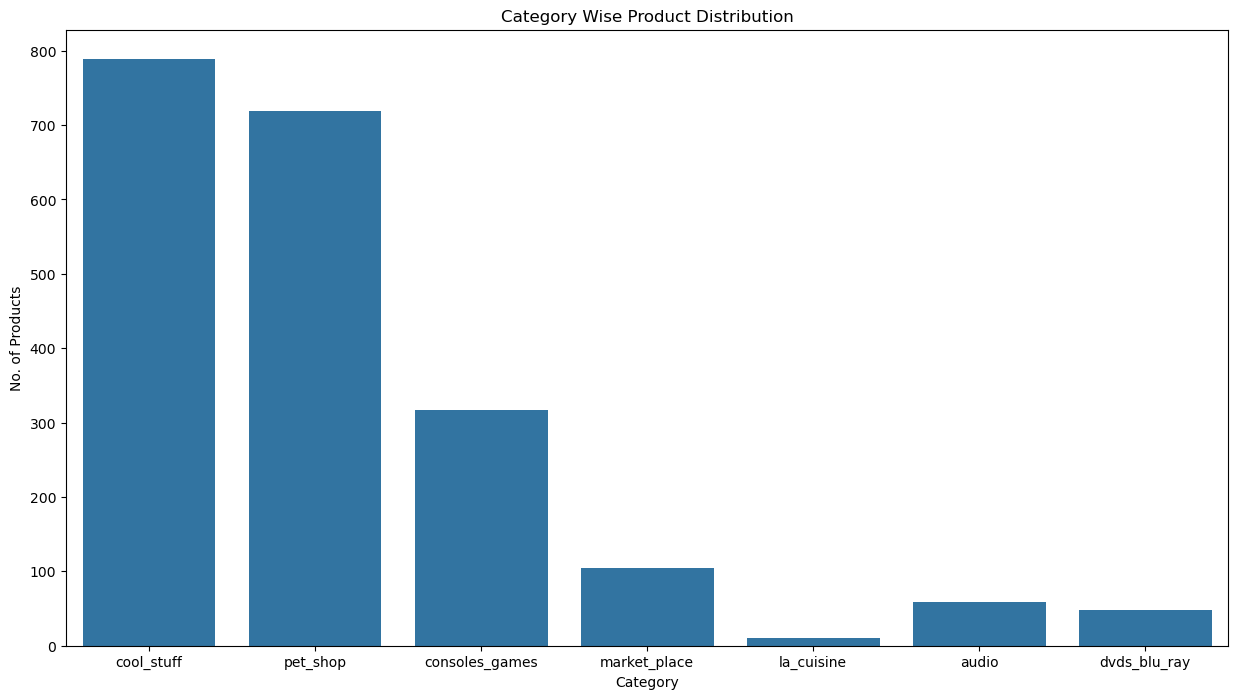

In [55]:
# plotting the category wise distribution of products
plt.figure(figsize=(15,8))
sns.countplot(x='product_category_name_english', data=product)
plt.title('Category Wise Product Distribution')
plt.xlabel('Category')
plt.ylabel('No. of Products')

Text(0.5, 0, 'Product Name Length')

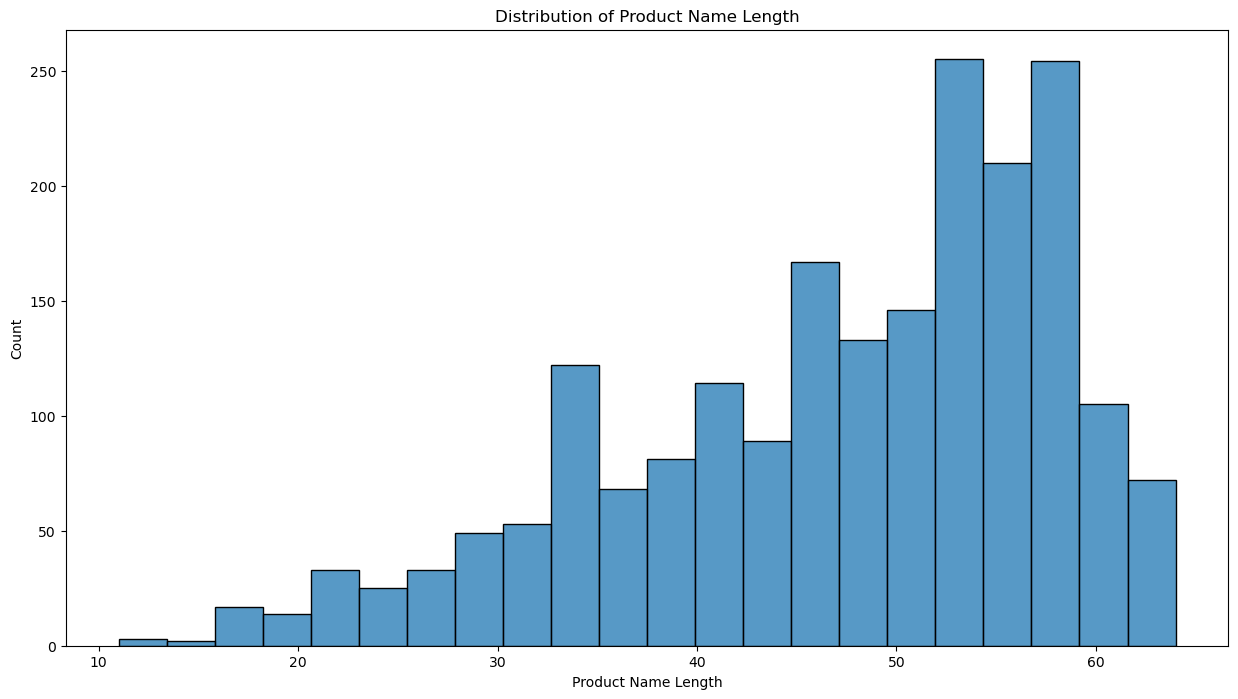

In [56]:

# plotting the distribution of product name length
plt.figure(figsize=(15,8))
sns.histplot(x='product_name_lenght', data=product)
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')

Text(0.5, 0, 'Product Description Length')

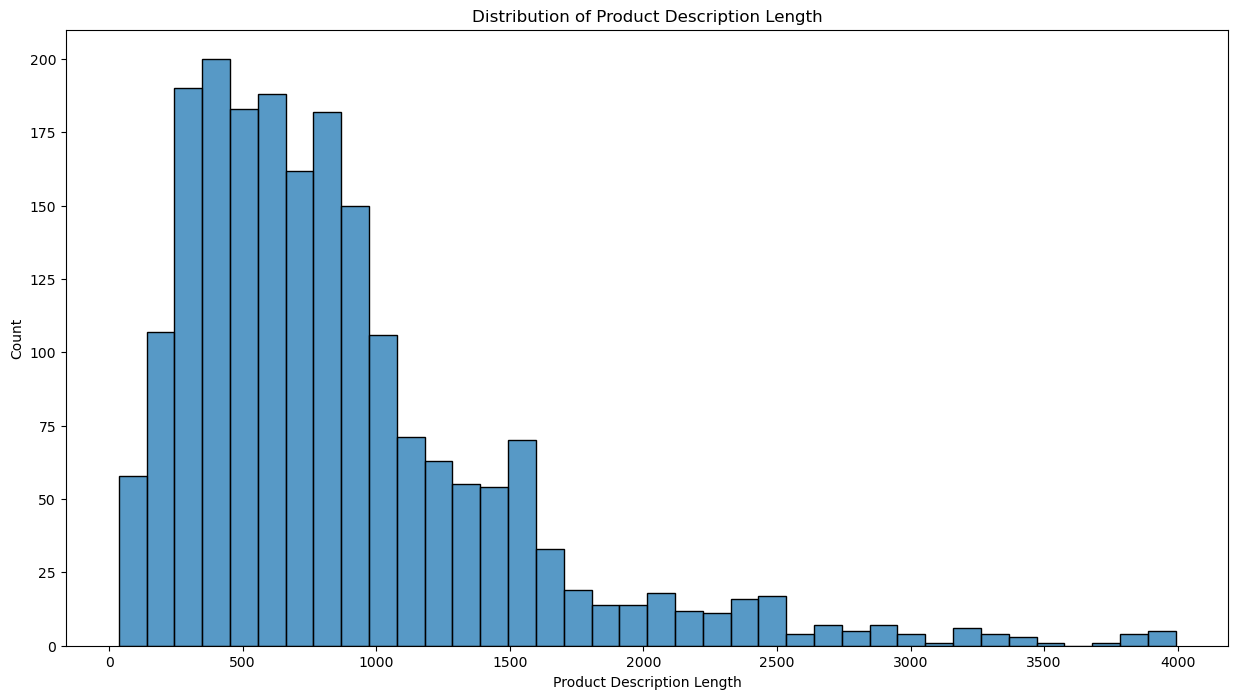

In [57]:
# plotting the distribution of product description length
plt.figure(figsize=(15,8))
sns.histplot(x='product_description_lenght', data=product)
plt.title('Distribution of Product Description Length')
plt.xlabel('Product Description Length')

Text(0.5, 0, 'Product Photos Quantity')

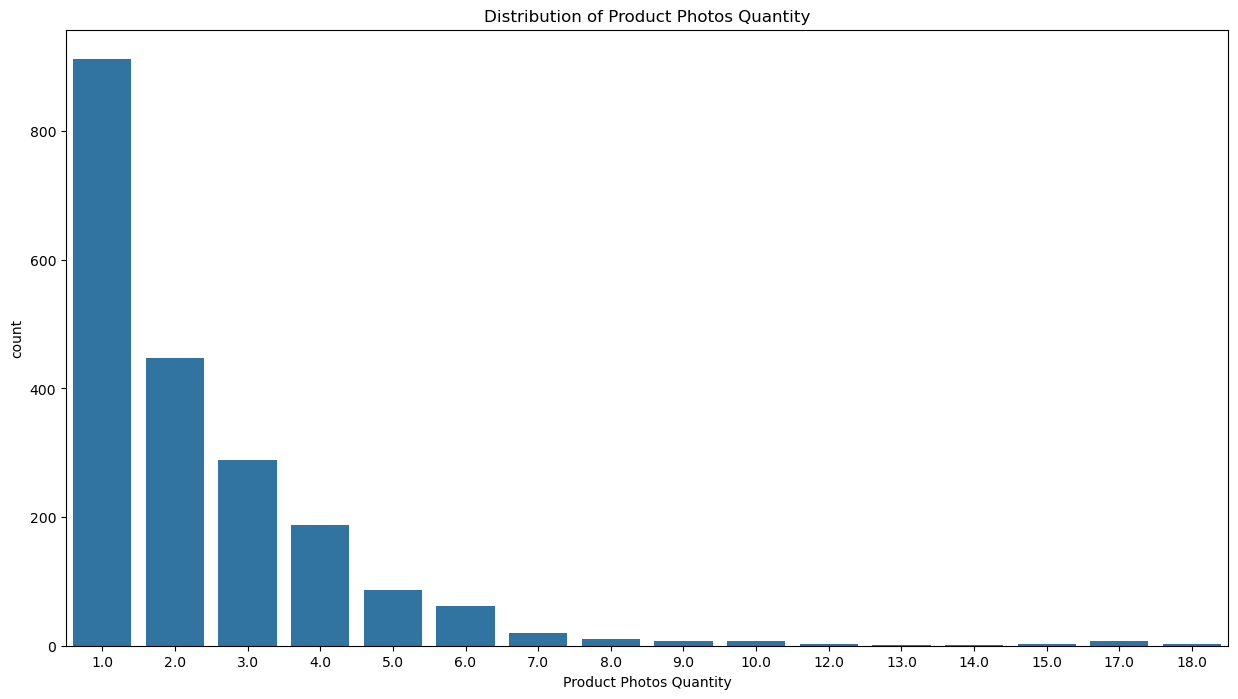

In [58]:
# plotting the distribution of product photos quantity
plt.figure(figsize=(15,8))
sns.countplot(x='product_photos_qty', data=product)
plt.title('Distribution of Product Photos Quantity')
plt.xlabel('Product Photos Quantity')

In [59]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [60]:
seller.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Text(0, 0.5, 'No. of Sellers')

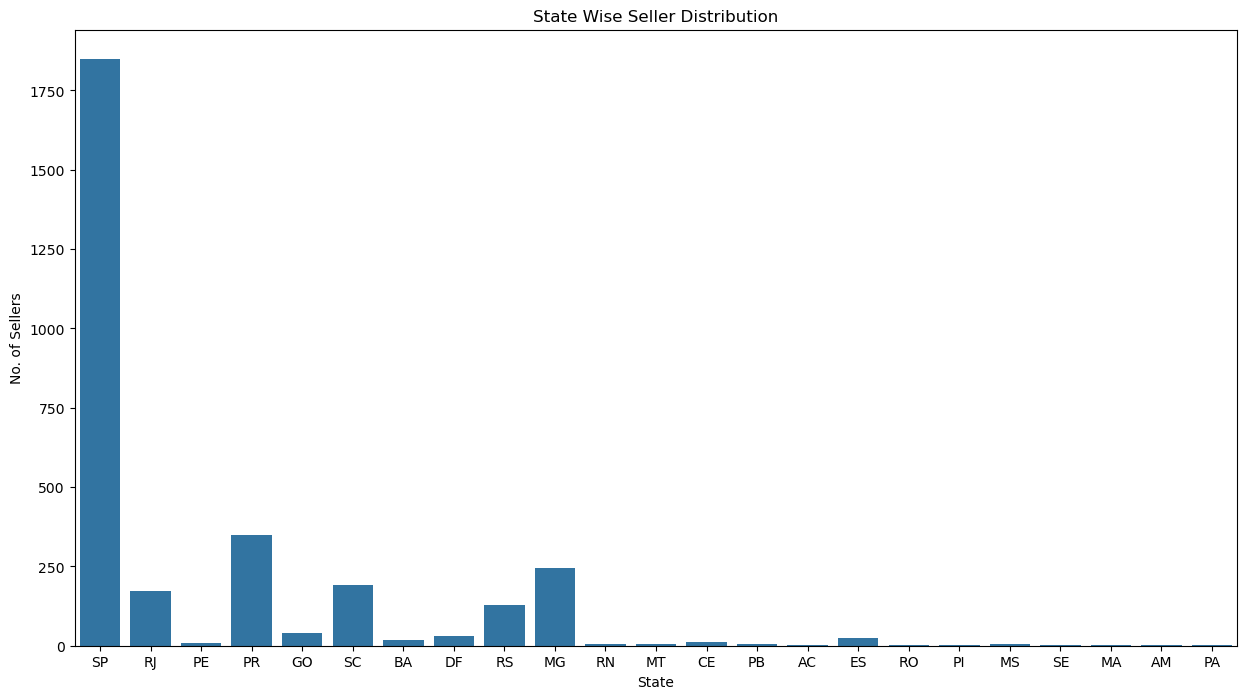

In [61]:
# plotting state wise seller distribution
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', data=seller)
plt.title('State Wise Seller Distribution')
plt.xlabel('State')
plt.ylabel('No. of Sellers')

In [62]:
# merging the datasets
df = pd.merge(order,payment, on='order_id', how='inner')
df = df.merge(review, on='order_id', how='inner')
df = df.merge(customer, on='customer_id', how='inner')
df = df.merge(item, on='order_id', how='inner')
df = df.merge(product, on='product_id', how='inner')
df = df.merge(seller, on='seller_id', how='inner')
df = df.merge(geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

In [63]:
# viewing the first few rows of the merged dataset
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_app_pur,diff_car_app,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.767733,-35.275467,sao goncalo do amarante,RN
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.771622,-35.271325,sao goncalo do amarante,RN
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.777424,-35.269238,sao goncalo do amarante,RN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.771259,-35.271049,sao goncalo do amarante,RN
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.773971,-35.277776,sao goncalo do amarante,RN


In [64]:
# dropping duplicate values
df = df.drop_duplicates()